# Feature Scaling

### Purpose: Feature scaling standardizes or normalizes the range of independent features (variables) to ensure all features contribute equally to the model, preventing bias toward features with larger magnitudes. it make group between lage and small unit equally.

In [1]:
# pip install scikit-learn

## 1. Min Max Scaling

### numeric values ko scale ma krta ha
   When to Use:

Useful when the distribution of the data is not Gaussian or when the algorithm assumes bounded input (e.g., neural networks, K-Nearest Neighbors).

Not suitable for data with significant outliers, as outliers can skew the min and max values.

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Sample data
data = {'awen_numbers': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)
df.head()

,awen_numbers
0,10
1,20
2,30
3,40
4,50


In [3]:
# scale the data using min max scalar
scaler = MinMaxScaler()
df['awen_numbers_scaled'] = scaler.fit_transform(df[['awen_numbers']])
df.head()

,awen_numbers,awen_numbers_scaled
0,10,0.00
1,20,0.25
2,30,0.50
3,40,0.75
4,50,1.00


# 2. Standard Scalar or Z-score normalization

## Purpose: Z-Score Normalization transforms features to have a mean of 0 and a standard deviation of 1, making the data resemble a standard normal distribution.  While Z-Score Normalization is less sensitive to outliers than Min-Max Scaling, extreme outliers can still affect the mean and standard deviation. Consider Robust Scaling if outliers are significant

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Sample data
data = {'awen_numbers': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)
df.head()

,awen_numbers
0,10
1,20
2,30
3,40
4,50


In [5]:
# scale the data using standard scalar
scaler = StandardScaler()
df['awen_numbers_scaled'] = scaler.fit_transform(df[['awen_numbers']])
df.head()

,awen_numbers,awen_numbers_scaled
0,10,-1.414214
1,20,-0.707107
2,30,0.000000
3,40,0.707107
4,50,1.414214


# 3. Robust scalar

In [6]:
from sklearn.preprocessing import RobustScaler
# Sample data with outliers
data = {'awen_numbers': [10, 20, 30, 1000, 50]}
df = pd.DataFrame(data)
# Robust Scaling
scaler = RobustScaler()
df['awen_numbers_scaled'] = scaler.fit_transform(df[['awen_numbers']])
print(df)

   awen_numbers  awen_numbers_scaled
0            10            -0.666667
1            20            -0.333333
2            30             0.000000
3          1000            32.333333
4            50             0.666667


# 4. Logrithmic scaling/ Normalization

In [7]:
import numpy as np
import pandas as pd

#random data with outliers
data = {'awen_numbers': [10000, 20000, 30000, 1000000, 50000]}
df = pd.DataFrame(data)

# Log Transform
df['awen_numbers_log'] = np.log(df['awen_numbers'])
df['awen_numbers_log2'] = np.log2(df['awen_numbers'])
df['awen_numbers_log10'] = np.log10(df['awen_numbers'])
df.head()

,awen_numbers,awen_numbers_log,awen_numbers_log2,awen_numbers_log10
0,10000,9.210340,13.287712,4.000000
1,20000,9.903488,14.287712,4.301030
2,30000,10.308953,14.872675,4.477121
3,1000000,13.815511,19.931569,6.000000
4,50000,10.819778,15.609640,4.698970


<Axes: xlabel='awen_numbers_log'>

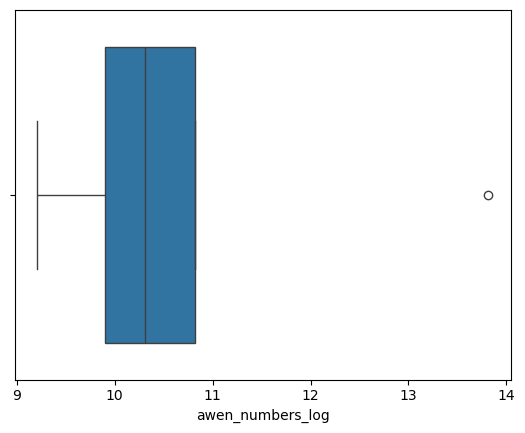

In [8]:
import seaborn as sns
sns.boxplot(df, x="awen_numbers_log")

# feature encoding 
 ### we encode catogrical values bcz it save memory
## 1) one hot encoding

In [9]:
import pandas as pd
# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)
print(df)
# One-Hot Encoding
encoded_data = pd.get_dummies(df, columns=['Color'])
print(encoded_data)

   Color
0    Red
1  Green
2   Blue
3    Red
   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False        False       True


# 2. Label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
# Sample data
data = {'Animal': ['Dog', 'Cat', 'Bird', 'Dog', "Bird"]}
df = pd.DataFrame(data)
print(df)

# Label Encoding
label_encoder = LabelEncoder()
df['Animal_encoded'] = label_encoder.fit_transform(df['Animal'])
print(df)


  Animal
0    Dog
1    Cat
2   Bird
3    Dog
4   Bird
  Animal  Animal_encoded
0    Dog               2
1    Cat               1
2   Bird               0
3    Dog               2
4   Bird               0


#  Ordinal encoding

In [11]:
from sklearn.preprocessing import OrdinalEncoder
# Sample data
data = {'Size': ['Small', 'Medium', 'Large', 'Medium']}
df = pd.DataFrame(data)
print(df)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
df['Size_encoded'] = ordinal_encoder.fit_transform(df[['Size']])
print(df)


     Size
0   Small
1  Medium
2   Large
3  Medium
     Size  Size_encoded
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
